# Aula 2 - Sinais em Tempo Discreto

Versão 2023

Essas notas de aula podem ser compartilhadas nos termos da lincença Creative Commons CC BY-NC-ND 4.0, com propósitos exclusivamente educacionais.

Attribution-NonCommercial-NoDerivatives 4.0 International


##  Algumas definições importantes
- Sinal: é uma função que representa uma quantidade física que contém informação sobre a natureza de um fenômeno.

- Sinais em tempo contínuo: a variável livre (p.ex. tempo) toma valores dentro de uma faixa contínua, $x(t),  t \in \mathbb{R}$
    
- Sinais em tempo discreto: a variável livre assume um conjunto de valores discreto no qual se faz correspondência com os números inteiros.

- Pode ser admitido como uma sequência de números: $\{x[n]\},  n = 0, \pm 1, \pm 2, \dots  n \in Z$

A notação adotada é: $()$ indica que a variável é contínua e $[]$ indica que a variável é discreta.

## Origem de um sinal discreto

Um sinal discreto no tempo $x[n]$ se origina a partir de um sinal contínuo no tempo tomando suas amostras em intervalos regularmente espaçados tais que: 

<font size="6"> $x[n] = x(t)|_{t = nT_a} = x(nT_a) \tag{1}$ </font>


* $T_a$ é o período de amostragem.
* O inverso, $1/T_a$, é a frequência de amostragem $F_a$.




![Aula_2_Slide_3.png](figuras/Aula_2_Slide_3.png)

## Sinais em tempo discreto básicos

### 1. Sequência Amostra Unitária 

<font size="6">$ \delta[n] = \begin{cases} 1, & n = 0 \\ 0, & n \neq 0 \end{cases} $</font>



Text(0, 0.5, '$\\delta[n]$')

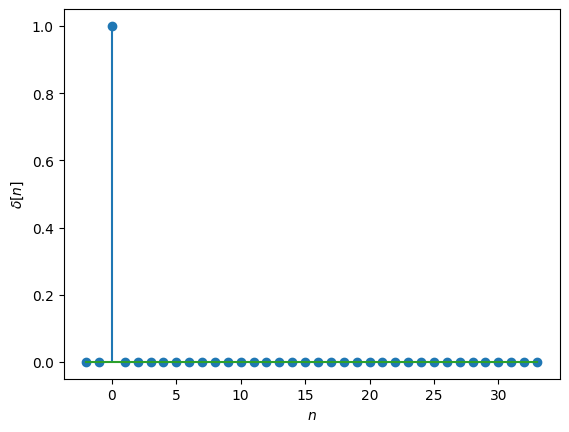

In [1]:
#| label: SinalImpulso
#| fig-cap: "Sinal Impulso Unitário"

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
N = 2
L = 36
x = signal.unit_impulse(L, N)
n = np.arange(len(x))-N
plt.stem(n, x, basefmt='C2-' )
plt.xlabel(r'$n$')
plt.ylabel(r'$\delta[n]$')

* Desempenha o mesmo papel da função impulso unitário nos sistemas contínuos.
* Qualquer sequência $x[n]$ pode ser escrita como uma soma ponderada de funções amostras unitária:

<font size="5">$ x[n] = \cdots + a_{-2}\delta[n+2] + a_{-1}\delta[n+1] + a_0\delta[n] + a_1\delta[n-1] + \cdots $</font>

<font size="5">$ \sum_{k=-\infty}^{\infty}x[k]\delta[n-k] \mbox{ em que: } a_k = x[k]$</font>

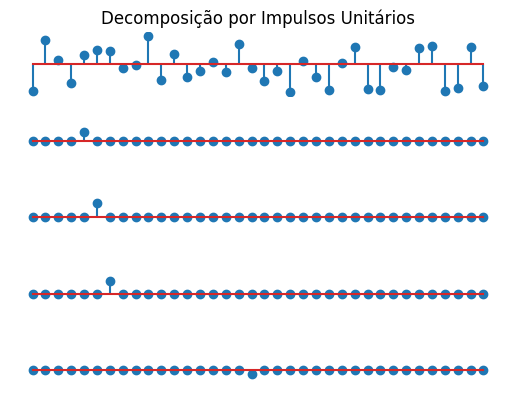

In [2]:
#| label: DecomposicaoImpulsos
#| fig-cap: "Decomposição por Impulsos Unitários"

x = np.random.rand(L) - 0.5

plt.subplot(511, frameon=False)
plt.axis('off')
plt.stem(n, x)
plt.ylim([-0.5, 0.5])
plt.title('Decomposição por Impulsos Unitários')

plt.subplot(512, frameon=False)
plt.axis('off')
y = np.zeros(L)
n0 = 4
y[n0] = x[n0]
plt.stem(n, y)
plt.ylim([-0.5, 0.5])

plt.subplot(513, frameon=False)
plt.axis('off')
y = np.zeros(L)
n0 = 5
y[n0] = x[n0]
plt.stem(n, y)
plt.ylim([-0.5, 0.5])

plt.subplot(514, frameon=False)
plt.axis('off')
y = np.zeros(L)
n0 = 6
y[n0] = x[n0]
plt.stem(n, y)
plt.ylim([-0.5, 0.5])

plt.subplot(515, frameon=False)
plt.axis('off')
y = np.zeros(L)
n0 = 17
y[n0] = x[n0]
plt.stem(n, y)
plt.ylim([-0.5, 0.5])
plt.show()

---
## 2. Sequência Degrau Unitário 

<font size="5">$ u[n] = \begin{cases} 1, & n \geq 0 \\ 0, & n < 0 \end{cases}$</font>

* muito útil para distinguir índices não negativos (positivos e o zero) dos índices negativos (tempo negativo).

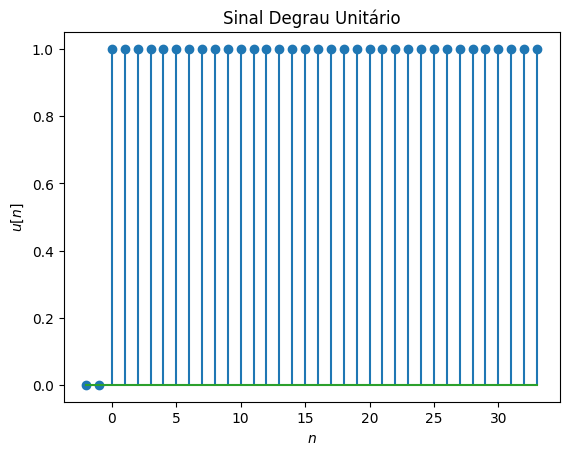

In [3]:
#| label: SinalDegrau
#| fig-cap: "Sinal Degrau Unitário"

def unit_step(n):
    unit = []
    for sample in n:
        if sample<0:
            unit.append(0)
        else:
            unit.append(1)
    return(unit)

degrau = unit_step(n)
plt.title("Sinal Degrau Unitário")
plt.stem(n, degrau, basefmt='C2-' )
plt.xlabel(r'$n$')
plt.ylabel(r'$u[n]$')
plt.show()

### Relações importantes:

Função degrau vista a partir de impulsos:
* <font size="5">$u[n] = \sum_{k=-\infty}^{n}\delta[k] = \sum_{k=0}^{\infty}\delta[n-k] $</font>

Função impulso vista a partir de degrau:
* <font size="5">$ \delta[n] = u[n] - u[n-1] $</font>

## 3.  Sequência Rampa

<font size="5">$ u_R[n] = \begin{cases} n, & n \geq 0 \\ 0, & n < 0 \end{cases} $</font>

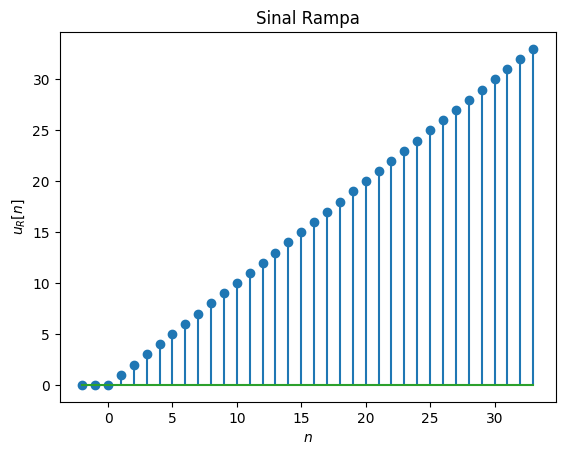

In [4]:
def rampa(n):
    unit = []
    for sample in n:
        if sample<0:
            unit.append(0)
        else:
            unit.append(sample)
    return(unit)

degrau = rampa(n)

plt.title("Sinal Rampa")
plt.stem(n, degrau, basefmt='C2-' )
plt.xlabel(r'$n$')
plt.ylabel(r'$u_R[n]$')
plt.show()

---
## 4.  Sequência Exponencial 

<font size="5">$ x[n] = a^nu[n]$</font>

* É muito utilizada no estudo de sistemas discretos no tempo. Se $|a| < 1$ ela toma a forma de uma exponencial amortecida.

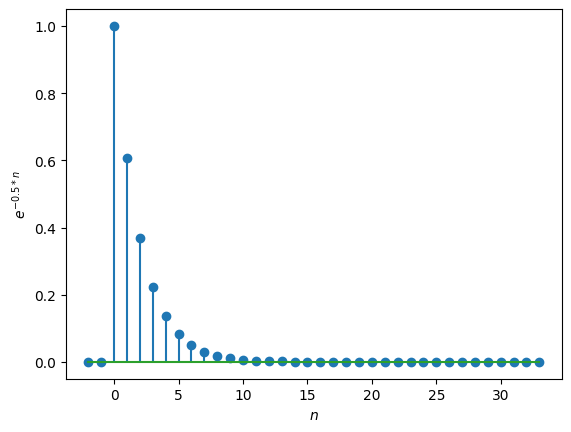

In [5]:
#| label: SinalExp
#| fig-cap: "Sinal Exponencial"

def SeqExp(n):
    unit = []
    for sample in n:
        if sample<0:
            unit.append(0)
        else:
            unit.append(np.e**(-0.5*sample))
    return(unit)

degrau = SeqExp(n)

plt.stem(n, degrau, basefmt='C2-' )
plt.xlabel(r'$n$')
plt.ylabel(r'$e^{-0.5*n}$')
plt.show()

---
## 5. Sequência Senoidal 

<font size="5">$ x[n] = A\cos(2\pi f_0 n + \phi) = A\cos(\omega_0 n+\phi)$</font>

Relação de Euler: 

<font size="5">$ x[n] = A\left(\frac{e^{j(\omega_0 n+\phi)}+e^{-j(\omega_0 n+\phi)}}{2}\right) $</font>



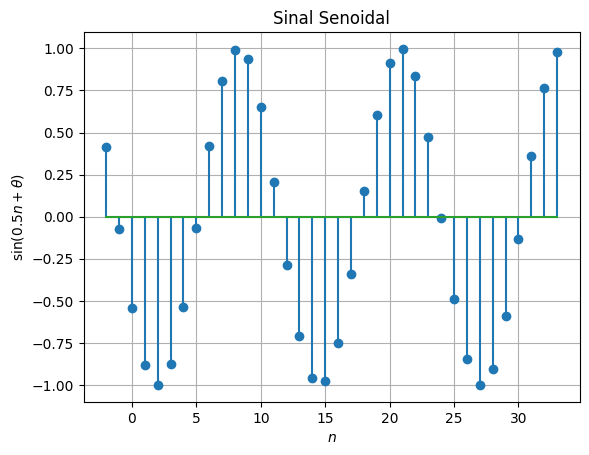

In [6]:
def SeqSen(n):
    unit = []
    for sample in n:
        # if sample<0:
        #     unit.append(0)
        # else:
        unit.append(np.sin(0.5*sample+10))
    return(unit)

seno = SeqSen(n)

plt.title("Sinal Senoidal")
plt.stem(n, seno, basefmt='C2-' )
plt.xlabel(r'$n$')
plt.ylabel(r'$\sin(0.5n+\theta)$')
plt.grid()
plt.show()

---
## Notação e unidades

* Frequências Analógicas: $\Omega$ (rad/s) ou (Hertz)
* Frequências Digitais: $\omega$ (rad/amostra) ou (ciclos/amostra)



## Teorema: Um sinal senoidal amostrado é periódico se o quociente entre a sua frequência e a taxa de amostragem for um número racional.
### <font size="5"> **Justificativa**  </font>:

1. Se $x[n]$ tem período $N$ então: 

$x[n] = x[n + N]\tag{1}$

2. Seja $x[n] = \cos[2\pi f_0n]$, então:

$ \cos[2\pi f_0n] = \cos[2\pi f_0(n+N)] = \cos[2\pi f_0n + 2\pi f_0N] \tag{2}$

3. A relação acima é verdadeira se: existir um número inteiro $M$ tal que:

$ 2\pi f_0N = 2\pi M \; \Rightarrow \; f_0 = \frac{M}{N} \tag{3}$


---
### Definições para Sinais Discretos
**<font size="4">1. Energia</font>**: 

<font size="4">$ E_x = \sum_{n=-\infty}^{\infty}|x[n]|^2 = \sum_{n=-\infty}^{\infty}x[n]x^\ast[n]  \tag{4}$</font>

<font size="4">**2. Potência Média:**</font> 

<font size="4">$ P_x = \lim_{N\to\infty} \frac{1}{2N+1} \sum_{n=-N}^{N}|x[n]|^2  \tag{5} $</font>

<font size="4">**3. Potência Média para Sinais Periódicos:**</font> 

<font size="4">$ P_x = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2 \tag{6}$</font>

## Exercício:  

**Determine a energia do seguinte sinal:** 

<font size="4">$ x[n] = Ae^{-\alpha n}u[n], \; \alpha>0 $</font>

<font size="5">**Solução**</font>

$ E_x = \sum_{n=0}^{\infty}(Ae^{-\alpha n})^2 = \sum_{n=0}^{\infty}A^2e^{-2\alpha n} = A^2\sum_{n=0}^{\infty}e^{-2\alpha n} $


$ \mbox{como: } \sum_{n=0}^{\infty}a^n = \frac{1}{1-a} \mbox{, para } |a|<1 $


$ \mbox{assim: } E_x = A^2 \frac{1}{1-e^{-2\alpha}} $